In [121]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from collections import defaultdict

In [122]:
# import dataset
data = pd.read_csv("data/azure/peoTV_user_ratings.csv")
data

ACCOUNT_NUM.hash            package  ratings
0     a6f795fa3e3bf7daec81bd44a9d1b59f  PEO_ENTERTAINMENT  0.65000
1     729e0a0a75015a8908d0989386f4454e         PEO_SILVER  0.00000
2     9fb15a37e248fce31c7d0ed98aaaaaf1         PEO_SILVER  0.71250
3     0d4098a262a8bed6ac4253f42dfc5769         PEO_SILVER  0.49375
4     fac45c3800fe3b9a28cc124f692a9f4a         PEO_SILVER  0.86875
...                                ...                ...      ...
1137  dbbb4011c6cc809850aa01f8ff5fe922         PEO_SILVER  0.76875
1138  7db2aa38214037279601a314071d1972            PRANAMA  0.77500
1139  f5934060d1b7b0a329df4d29242225b8         PEO_SILVER  0.95000
1140  89fc7c615b7a6c4baefb1cb9b4555d7b         PEO_SILVER  0.00000
1141  42ed358740d41f10352fd59f4a76e5ca         PEO_SILVER  0.71250

[1142 rows x 3 columns]

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  1142 non-null   object 
 1   package           1142 non-null   object 
 2   ratings           1142 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.9+ KB


## Interaction Matrix

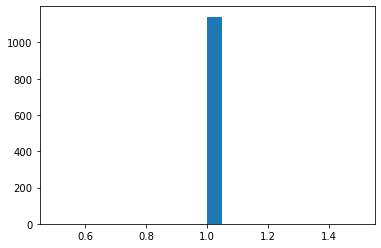

In [124]:
# create a histogram of all the interactions by all the users present in the dataset
interactions = data.groupby('ACCOUNT_NUM.hash').count()['package']
plt.hist(interactions,bins=20)
plt.show()

In [125]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="ACCOUNT_NUM.hash", columns="package", values="ratings",aggfunc=np.sum)

In [126]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 0009e7e4d940c2a539b89342af07e7f1 to ffd820977e139cbabf31dbeb5dcc1b23
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DOUBLEPROMO                  2 non-null      float64
 1   LOTUS                        2 non-null      float64
 2   NEW_SLT_STAFF_PACKAGE        9 non-null      float64
 3   NEW_YEAR_TREAT               4 non-null      float64
 4   PEO_ENTERTAINMENT            15 non-null     float64
 5   PEO_FAMILY                   1 non-null      float64
 6   PEO_GOLD                     5 non-null      float64
 7   PEO_PLATINUM                 3 non-null      float64
 8   PEO_RELIGIOUS_PACKAGE        3 non-null      float64
 9   PEO_SILVER                   778 non-null    float64
 10  PEO_SILVER_FTTH              2 non-null      float64
 11  PEO_SILVER_PLUS              52 non-null     float64
 12  PEO_TITANIUM          

In [127]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [128]:
interactions_metrix.sample(n=10)

package                           DOUBLEPROMO  LOTUS  NEW_SLT_STAFF_PACKAGE  \
ACCOUNT_NUM.hash                                                              
bf8a508a532251ad33273c1f2297e019          0.0    0.0                    0.0   
12e8ff3dc92bc4fdbd7840c05468bc09          0.0    0.0                    0.0   
2e372c942e3f6b364f797cd814eb66ca          0.0    0.0                    0.0   
f4fbb505ab38dec40e123a0f1badd228          0.0    0.0                    0.0   
efdddc591edae3f10ed894afef27d30e          0.0    0.0                    0.0   
434555d3b0229289fd08ae8d64c55148          0.0    0.0                    0.0   
4e011f92d67195f03b959d879929d125          0.0    0.0                    0.0   
b6ca5890dc144d037959fe76034f6b06          0.0    0.0                    0.0   
9581c23c08a5e9e85794daa6630aa600          0.0    0.0                    0.0   
5ac9d5e02406067f6cc31d5436a5a8fb          0.0    0.0                    0.0   

package                           NEW_YEAR_TREAT  PEO_ENTERTAINMENT  \
ACCOUNT_NUM.hash                                                      
bf8a508a532251ad33273c1f2297e019             0.0                0.0   
12e8ff3dc92bc4fdbd7840c05468bc09             0.0                0.0   
2e372c942e3f6b364f797cd814eb66ca             0.0                0.0   
f4fbb505ab38dec40e123a0f1badd228             0.0                0.0   
efdddc591edae3f10ed894afef27d30e             0.0                0.0   
434555d3b0229289fd08ae8d64c55148             0.0                0.0   
4e011f92d67195f03b959d879929d125             0.0                0.0   
b6ca5890dc144d037959fe76034f6b06             0.0                0.0   
9581c23c08a5e9e85794daa6630aa600             0.0                0.0   
5ac9d5e02406067f6cc31d5436a5a8fb             0.0                0.0   

package                           PEO_FAMILY  PEO_GOLD  PEO_PLATINUM  \
ACCOUNT_NUM.hash                                                       
bf8a508a532251ad33273c1f2297e019         0.0       0.0           0.0   
12e8ff3dc92bc4fdbd7840c05468bc09         0.0       0.0           0.0   
2e372c942e3f6b364f797cd814eb66ca         0.0       0.0           0.0   
f4fbb505ab38dec40e123a0f1badd228         0.0       0.0           0.0   
efdddc591edae3f10ed894afef27d30e         0.0       0.0           0.0   
434555d3b0229289fd08ae8d64c55148         0.0       0.0           0.0   
4e011f92d67195f03b959d879929d125         0.0       0.0           0.0   
b6ca5890dc144d037959fe76034f6b06         0.0       0.0           0.0   
9581c23c08a5e9e85794daa6630aa600         0.0       0.0           0.0   
5ac9d5e02406067f6cc31d5436a5a8fb         0.0       0.0           0.0   

package                           PEO_RELIGIOUS_PACKAGE  PEO_SILVER  \
ACCOUNT_NUM.hash                                                      
bf8a508a532251ad33273c1f2297e019                    0.0     0.95000   
12e8ff3dc92bc4fdbd7840c05468bc09                    0.0     0.00000   
2e372c942e3f6b364f797cd814eb66ca                    0.0     0.00000   
f4fbb505ab38dec40e123a0f1badd228                    0.0     0.00000   
efdddc591edae3f10ed894afef27d30e                    0.0     0.00000   
434555d3b0229289fd08ae8d64c55148                    0.0     0.28125   
4e011f92d67195f03b959d879929d125                    0.0     0.62500   
b6ca5890dc144d037959fe76034f6b06                    0.0     0.91875   
9581c23c08a5e9e85794daa6630aa600                    0.0     0.83125   
5ac9d5e02406067f6cc31d5436a5a8fb                    0.0     0.20000   

package                           PEO_SILVER_FTTH  PEO_SILVER_PLUS  \
ACCOUNT_NUM.hash                                                     
bf8a508a532251ad33273c1f2297e019              0.0              0.0   
12e8ff3dc92bc4fdbd7840c05468bc09              0.0              0.0   
2e372c942e3f6b364f797cd814eb66ca              0.0              0.0   
f4fbb505ab38dec40e123a0f1badd228              0.0              0.0   
efdddc591edae3f10ed894afef27d30e              0.0           

In [129]:
reader = Reader(rating_scale=(0, 1))
data_model = Dataset.load_from_df(data, reader)

In [130]:
trainset, testset = train_test_split(data_model, test_size=.20)

## Collabarative Recoomenders with Surprise

In [131]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [132]:
def get_top_n(predictions, n=10):


    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:5]
        

    return top_n

In [153]:
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

### SVD recommender

In [133]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
svd_validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3247  0.3293  0.3385  0.3502  0.3330  0.3352  0.0088  
MAE (testset)     0.2739  0.2764  0.2874  0.2930  0.2872  0.2836  0.0072  
Fit time          0.09    0.11    0.10    0.08    0.11    0.10    0.01    
Test time         0.02    0.00    0.00    0.00    0.00    0.00    0.01    


In [134]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

## Top-N predictions

In [135]:
top_n = get_top_n(predictions, n=10)
#print(top_n)
users_est = defaultdict(list)
users_true=defaultdict(list)
rec_for_user=defaultdict(list)
for uid, user_ratings in top_n.items():
    users_est[uid].append([est for (_, est,_) in user_ratings])
    users_true[uid].append([true_r for (_,_,true_r) in user_ratings])
    rec_for_user[uid].append([iid for (iid,_,_) in user_ratings])

## NDCG

In [154]:
ndcg_list=[]
for uid in top_n:
    
    for i in users_true[uid]:
        y_true=np.asarray(i)#.reshape(-1,1)
    for i in users_est[uid]:
        y_pred=np.asarray(i)#.reshape(-1,1)
    
        ndcg_list.append(ndcg1(y_true, y_pred, k=None))

<ipython-input-153-91ba19334a30>:23: RuntimeWarning: invalid value encountered in double_scalars
  return dcg_score / ideal_dcg_score


In [156]:
ndcg_list = [i for i in ndcg_list if str(i) != 'nan']
np.mean(ndcg_list)

1.0

In [136]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [137]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

uid              iid      rui       est  \
164  62bd8ebb6ff7c3676ef87c700ed15758          PRANAMA  0.65000  0.649406   
115  b7248e85b8f1acf643ee05f42d15dd9f  PEO_SILVER_PLUS  0.68125  0.676113   
129  ab11afafb1f13570f6265062759fa88c      PEO_UTHAYAM  0.55625  0.547535   
62   37161fef49494cbf67eea792daad122c  PEO_SILVER_FTTH  0.53125  0.541449   
123  13da2acd177eb3f6666b22201f00f7f1       PEO_SILVER  0.56875  0.555411   
26   a82f1ccde9bd1c8a494ba21042be5bf7       PEO_SILVER  0.53750  0.555411   
226  b96b2d5d269fbfd7787d2ce3597de4c2       PEO_SILVER  0.53750  0.555411   
34   24bfbfaec2e2087b143006a0d8821a07       PEO_SILVER  0.53750  0.555411   
171  9390b2db55d18b6dca928bc8d11f84fb       PEO_SILVER  0.53750  0.555411   
173  abc32a38bc7beb0bdedd96e856404c58       PEO_SILVER  0.53750  0.555411   

                       details  Iu   Ui       err  
164  {'was_impossible': False}   0   41  0.000594  
115  {'was_impossible': False}   0   43  0.005137  
129  {'was_impossible': False}   0  117  0.008715  
62   {'was_impossible': False}   0    1  0.010199  
123  {'was_impossible': False}   0  623  0.013339  
26   {'was_impossible': False}   0  623  0.017911  
226  {'was_impossible': False}   0  623  0.017911  
34   {'was_impossible': False}   0  623  0.017911  
171  {'was_impossible': False}   0  623  0.017911  
173  {'was_impossible': False}   0  623  0.017911

In [138]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3202
RMSE --> 0.3201540223067395
Accuracy --> 0.6798459776932605


### SlopeOne recommender

In [139]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
so_validate =cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3223  0.3329  0.3484  0.3330  0.3356  0.3344  0.0083  
MAE (testset)     0.2701  0.2815  0.2981  0.2864  0.2868  0.2846  0.0091  
Fit time          0.03    0.02    0.01    0.02    0.02    0.02    0.01    
Test time         0.01    0.00    0.00    0.00    0.00    0.00    0.00    


In [140]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

<ipython-input-140-c41232ee9814>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  algo.fit(trainset)


In [141]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [142]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

uid                    iid      rui  \
30   ff6a9ebde4f19c42c852aa679c877b41  NEW_SLT_STAFF_PACKAGE  0.56250   
123  13da2acd177eb3f6666b22201f00f7f1             PEO_SILVER  0.56875   
129  ab11afafb1f13570f6265062759fa88c            PEO_UTHAYAM  0.55625   
211  e0e16275eab60ed6f36ffc21f09a5844             PEO_SILVER  0.58750   
4    c6619ae97017ca7fc55cebfc01e050df            PEO_UTHAYAM  0.58750   
13   4ddd3dc2b7a3fe4907f9806fc67ab627             PEO_SILVER  0.58750   
173  abc32a38bc7beb0bdedd96e856404c58             PEO_SILVER  0.53750   
26   a82f1ccde9bd1c8a494ba21042be5bf7             PEO_SILVER  0.53750   
171  9390b2db55d18b6dca928bc8d11f84fb             PEO_SILVER  0.53750   
34   24bfbfaec2e2087b143006a0d8821a07             PEO_SILVER  0.53750   

          est                                            details  Iu   Ui  \
30   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0    7   
123  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
129  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  117   
211  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
4    0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  117   
13   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
173  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
26   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
171  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
34   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   

          err  
30   0.001054  
123  0.005196  
129  0.007304  
211  0.023946  
4    0.023946  
13   0.023946  
173  0.026054  
26   0.026054  
171  0.026054  
34   0.026054

In [143]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3209
RMSE --> 0.32086985621064085
Accuracy --> 0.6791301437893591


### KNN with Means recommender

In [144]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
knn_validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3381  0.3241  0.3408  0.3296  0.3406  0.3346  0.0066  
MAE (testset)     0.2894  0.2794  0.2878  0.2820  0.2845  0.2846  0.0037  
Fit time          0.11    0.09    0.09    0.08    0.07    0.09    0.01    
Test time         0.01    0.00    0.00    0.00    0.00    0.00    0.00    


In [145]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [146]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [147]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

uid                    iid      rui  \
30   ff6a9ebde4f19c42c852aa679c877b41  NEW_SLT_STAFF_PACKAGE  0.56250   
123  13da2acd177eb3f6666b22201f00f7f1             PEO_SILVER  0.56875   
129  ab11afafb1f13570f6265062759fa88c            PEO_UTHAYAM  0.55625   
211  e0e16275eab60ed6f36ffc21f09a5844             PEO_SILVER  0.58750   
4    c6619ae97017ca7fc55cebfc01e050df            PEO_UTHAYAM  0.58750   
13   4ddd3dc2b7a3fe4907f9806fc67ab627             PEO_SILVER  0.58750   
173  abc32a38bc7beb0bdedd96e856404c58             PEO_SILVER  0.53750   
26   a82f1ccde9bd1c8a494ba21042be5bf7             PEO_SILVER  0.53750   
171  9390b2db55d18b6dca928bc8d11f84fb             PEO_SILVER  0.53750   
34   24bfbfaec2e2087b143006a0d8821a07             PEO_SILVER  0.53750   

          est                                            details  Iu   Ui  \
30   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0    7   
123  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
129  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  117   
211  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
4    0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  117   
13   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
173  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
26   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
171  0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   
34   0.563554  {'was_impossible': True, 'reason': 'User and/o...   0  623   

          err  
30   0.001054  
123  0.005196  
129  0.007304  
211  0.023946  
4    0.023946  
13   0.023946  
173  0.026054  
26   0.026054  
171  0.026054  
34   0.026054

In [148]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3209
RMSE --> 0.32086985621064085
Accuracy --> 0.6791301437893591


### Benchmark algorithms

In [149]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
val_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
val_df

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usin

test_rmse  fit_time  test_time
Algorithm                                   
BaselineOnly   0.333627  0.004199   0.002401
SVD            0.333928  0.071650   0.001400
KNNBaseline    0.334015  0.068201   0.002600
KNNWithMeans   0.334312  0.085011   0.003001
SlopeOne       0.334317  0.016000   0.001799
CoClustering   0.334619  0.140066   0.004325

## CF Recommenders Accuracy Plots

In [150]:
svd_validate["test_rmse"]

array([0.32468751, 0.32933123, 0.33848596, 0.35023866, 0.33304333])

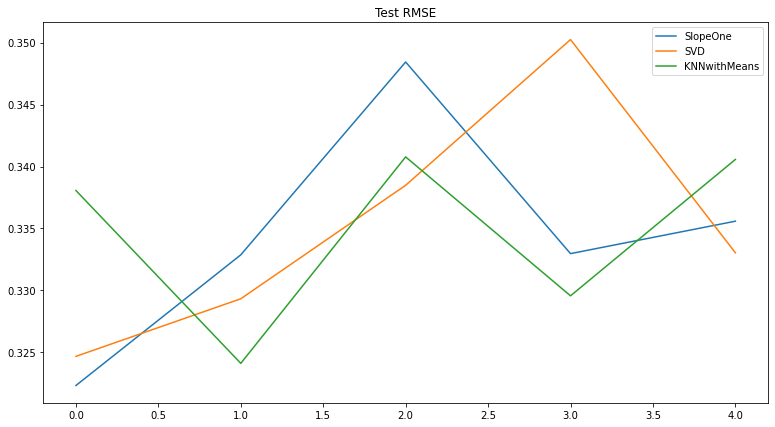

In [151]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_rmse"])
ax.plot(svd_validate["test_rmse"])
ax.plot(knn_validate["test_rmse"])
# plt.xticks(np.arange(0, 30, 0.5))
plt.title("Test RMSE", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans"])

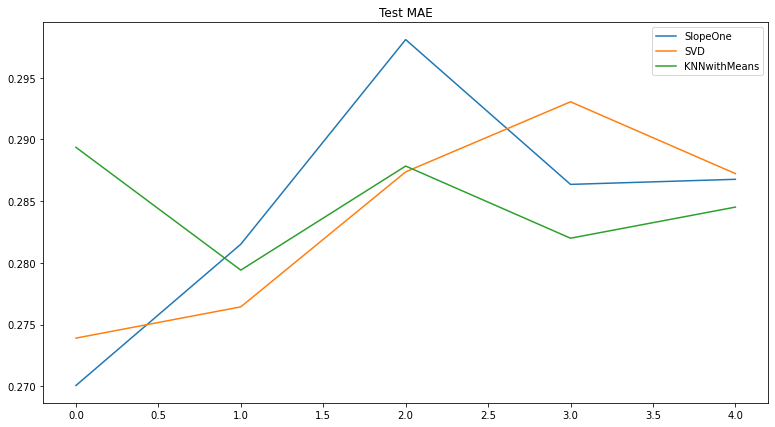

In [152]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_mae"])
ax.plot(svd_validate["test_mae"])
ax.plot(knn_validate["test_mae"])
# plt.xticks(np.arange(0, 4, 0.2))
plt.title("Test MAE", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans"])